# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Dana Affan Rabbani
- **Email:** danaffani@gmail.com
- **ID Dicoding:** danaffani

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: What percentage of the time did PM2.5 values ​​exceed the health threshold on 4th interm target set by WHO at each station during 2015?
- Pertanyaan 2: What season has the worst PM2.5 levels across all stations?

## Import Semua Packages/Library yang Digunakan

In [122]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

**Insight:**
- This project imports some of the library for data manipulation and statistical analysis such as csv that used because of the dataset format in the project, it ensure that the data can be accessed by the code. pandas library is used to manages tabular data (DataFrames). Numpy is used to do the numerical calculation in this project.
- This also include the visualization library such as matlib and seaborn.
- style with whitegrid used to makes the table data looks clean and easy to read.

## Data Wrangling

### Gathering Data

In [123]:
file_paths = [
    "data/PRSA_Data_Aotizhongxin_20130301-20170228.csv",
    "data/PRSA_Data_Changping_20130301-20170228.csv",
    "data/PRSA_Data_Dingling_20130301-20170228.csv",
    "data/PRSA_Data_Guanyuan_20130301-20170228.csv",
    "data/PRSA_Data_Gucheng_20130301-20170228.csv",
    "data/PRSA_Data_Huairou_20130301-20170228.csv",
    "data/PRSA_Data_Nongzhanguan_20130301-20170228.csv",
    "data/PRSA_Data_Shunyi_20130301-20170228.csv",
    "data/PRSA_Data_Tiantan_20130301-20170228.csv",
    "data/PRSA_Data_Wanliu_20130301-20170228.csv",
    "data/PRSA_Data_Wanshouxigong_20130301-20170228.csv",
    "data/PRSA_Data_Aotizhongxin_20130301-20170228.csv",
]

df_list = []
for file_path in file_paths:
    df = pd.read_csv(file_path)
    df_list.append(df)

combined_df = pd.concat(df_list, ignore_index=True)
combined_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- These datasets are CSV files from various air quality monitoring data with range from 2013 to 2017. I used file_paths to make it easier for pd.read_csv() function to read the data and save it to df_list().
- Each of the file includes measurements such as PM2.5, PM10, and other air pollutants, along with meteorological factors like temperature and humidity.
- By combining all the datasets into a single big data using pd.concat(), I can perform a comprehensive analysis across different regions, and save the data as combined_df().

### Assessing Data

In [124]:
combined_df.isnull().sum()

combined_df.describe()

combined_df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

**Insight:**
- After merging the datasets, we observe some missing values, especially in PM2.5 readings and other pollutant-related columns.
- I used combined_df.insull().sum() to check if there is any missing value inside the combined_df().
- The data seems to contain measurements from several different stations, which allows for comparative analysis across regions, and I used describe() function to create basic statistic for numerical column and then displayed by combined_df.comumns.

### Cleaning Data

In [125]:
cleaned_df = combined_df.dropna()

print("Available columns: ", cleaned_df.columns)

if 'date' in cleaned_df.columns:
    cleaned_df['date'] = pd.to_datetime(cleaned_df['date'])
    print("Time column converted successfully.")
else:
    print("Time column not found. Please check the column names.")

cleaned_df.info()


Available columns:  Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')
Time column not found. Please check the column names.
<class 'pandas.core.frame.DataFrame'>
Index: 383645 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       383645 non-null  int64  
 1   year     383645 non-null  int64  
 2   month    383645 non-null  int64  
 3   day      383645 non-null  int64  
 4   hour     383645 non-null  int64  
 5   PM2.5    383645 non-null  float64
 6   PM10     383645 non-null  float64
 7   SO2      383645 non-null  float64
 8   NO2      383645 non-null  float64
 9   CO       383645 non-null  float64
 10  O3       383645 non-null  float64
 11  TEMP     383645 non-null  float64
 12  PRES     383645 non-null  float64
 13  DEWP     383645 non-null  float64
 14  RAIN     383645 

**Insight:**
- Missing values were handled by removing rows with NaN values using dropna() function and saved as cleaned_df().
- Some columns were converted to more appropriate data types, such as changing the time column to datetime format for easier time-series analysis with pd.to_datetime() function.
- info() is used just to tell simple information about cleaned_df()

## Exploratory Data Analysis (EDA)

### Explore ...

Understanding data distribution involves examining how the values of a particular variable are spread across the dataset. Additionally, it is important to identify outliers, which are unusual values that may impact the analysis. Another key aspect is analyzing the relationships between variables to understand how one variable might influence another. Lastly, ensuring data quality involves checking for missing values and errors within the dataset to ensure accurate and reliable analysis.

In [126]:
description = cleaned_df.describe()

average_pm25 = cleaned_df.groupby('station')['PM2.5'].mean().reset_index()
total_measurements = cleaned_df.groupby('station').size().reset_index(name='Total Measurements')

cleaned_df_copy = cleaned_df.copy()

cleaned_df_copy.loc[:, 'datetime'] = pd.to_datetime(cleaned_df_copy[['year', 'month', 'day', 'hour']])
cleaned_df_copy.loc[:, 'total_seconds'] = (cleaned_df_copy['datetime'] - cleaned_df_copy['datetime'].min()).dt.total_seconds()

time_stats = cleaned_df_copy.groupby('station').agg(
    Average_Time_Hours=('total_seconds', lambda x: x.mean() / 3600),
    Total_Time_Hours=('total_seconds', lambda x: x.sum() / 3600)
).reset_index()

sorted_avg_pm25 = average_pm25.sort_values(by='PM2.5', ascending=False)

print("Basic statistic description:\n", description)
print("\nAverage PM2.5 per Station:\n", average_pm25)
print("\nTotal Measurements per Station:\n", total_measurements)
print("\nTime Statistics per Station:\n", time_stats)
print("\nAverage PM2.5 Sorted:\n", sorted_avg_pm25)

Basic statistic description:
                   No           year          month            day  \
count  383645.000000  383645.000000  383645.000000  383645.000000   
mean    17883.820112    2014.707558       6.464661      15.705139   
std     10027.798178       1.162902       3.447311       8.802661   
min         1.000000    2013.000000       1.000000       1.000000   
25%      9451.000000    2014.000000       3.000000       8.000000   
50%     18014.000000    2015.000000       6.000000      16.000000   
75%     26486.000000    2016.000000       9.000000      23.000000   
max     35064.000000    2017.000000      12.000000      31.000000   

                hour         PM2.5           PM10            SO2  \
count  383645.000000  383645.00000  383645.000000  383645.000000   
mean       11.585215      79.19901     104.443369      15.654373   
std         6.931587      79.74762      90.987761      21.489499   
min         0.000000       2.00000       2.000000       0.285600   
25%     

**Insight:**
- Using describe() to create basic statistic descriptive for numerical column in cleaned_df.
- Make a copy using copy() function from cleaned_df as cleaned_df_copy before proceed further.
- Basic statistics for the entire dataset are calculated (count, mean, min, 25%, 50%, 75%, max, standard deviation).
- The data is grouped by station and the average PM2.5, total number of measurements, and time statistics are calculated for each station using groupby().
- The time data is converted to datetime format for further analysis.
- I used agg() function to calculate 2 new statscics (average and total time in hour) for each station based on total_seconds data. This will makes the code to compute multiple aggregations in single operation.
- Stations are sorted by average PM2.5 in descending order because ascending=False.

## Visualization & Explanatory Analysis

### Pertanyaan 1: What percentage of the time did PM2.5 values ​​exceed the health threshold on 4th interm target set by WHO at each station during 2015?

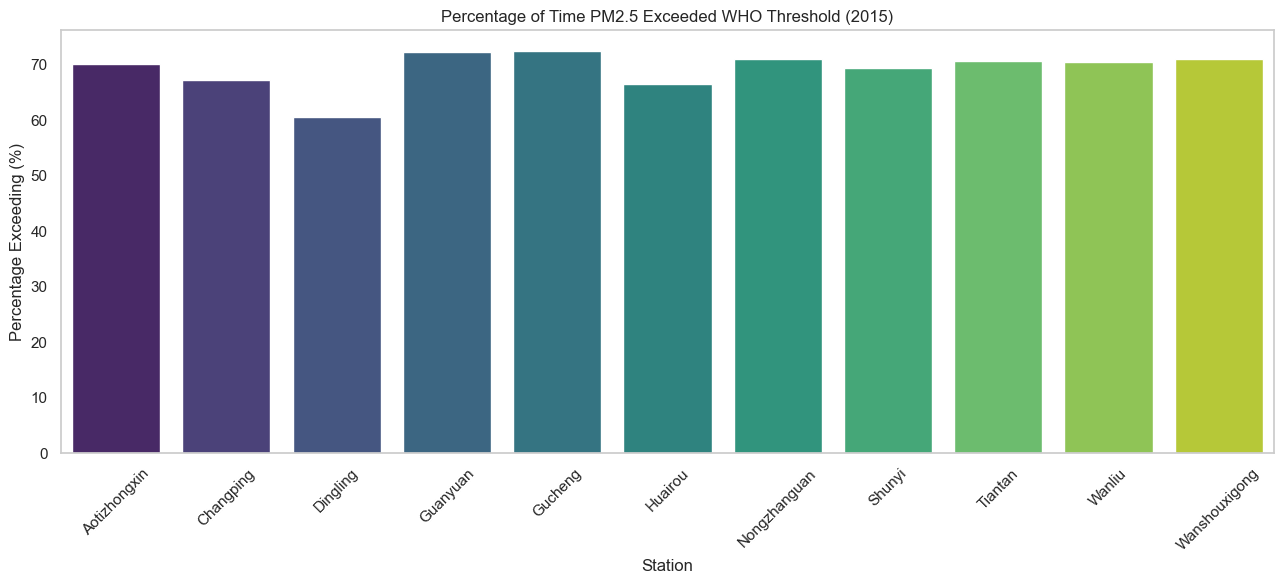

In [127]:
cleaned_df_copy = cleaned_df.copy()

cleaned_df_copy.loc[:, 'year'] = pd.to_numeric(cleaned_df_copy['year'], errors='coerce')
cleaned_df_copy.loc[:, 'month'] = pd.to_numeric(cleaned_df_copy['month'], errors='coerce')
cleaned_df_copy.loc[:, 'day'] = pd.to_numeric(cleaned_df_copy['day'], errors='coerce')
cleaned_df_copy.loc[:, 'hour'] = pd.to_numeric(cleaned_df_copy['hour'], errors='coerce')

cleaned_df_copy.dropna(subset=['year', 'month', 'day', 'hour'], inplace=True)
cleaned_df_copy.loc[:, 'datetime'] = pd.to_datetime(cleaned_df_copy[['year', 'month', 'day', 'hour']])

data_2016 = cleaned_df_copy[cleaned_df_copy['datetime'].dt.year == 2015]
threshold = 25  # threshold limit 4th intern target set by WHO

results = data_2016.groupby('station').agg(
    Total_Measurements=('PM2.5', 'count'),
    Exceeding_Count=('PM2.5', lambda x: (x > threshold).sum())
).reset_index()

results['Percentage_Exceeding'] = (results['Exceeding_Count'] / results['Total_Measurements']) * 100

plt.figure(figsize=(13, 6))
sns.barplot(data=results, x='station', y='Percentage_Exceeding', palette='viridis', hue='station')
plt.title('Percentage of Time PM2.5 Exceeded WHO Threshold (2015)')
plt.xlabel('Station')
plt.ylabel('Percentage Exceeding (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Insight:**
- Create a copy of the cleaned_df as cleaned_df_copy and then convert datetime() to date time type (year, month, day, hour).
- I also using .loc to handle any errors and convert its date time data to numeric using to_numeric()
- threshold set to 25 for 4th intern target in 24-hours term, based from https://www.who.int/news-room/fact-sheets/detail/ambient-(outdoor)-air-quality-and-health?gad_source=1&gclid=EAIaIQobChMIzseajPfviAMVZw6DAx1RGw_wEAAYASAAEgILyPD_BwE.
- Here I also using agg() function to compute 2 new statistics(total measurements and exceeding amount) from PM2.5 in every station.
- count total time and time when the station is above threshold level, and count it's percentage.

**Answers:**
- From the graph above, it shows how much the average percentage of time of PM2.5 level from every station exceeds WHO's PM2.5 4th intern target threshhold by 2015.
- Guncheng station has the biggest percentage that makes it the worst air quality, while Dingling station has relatively good air quality compared to the other stations because of the lowest percentage.

### Pertanyaan 2: What season has the worst PM2.5 levels across all stations?

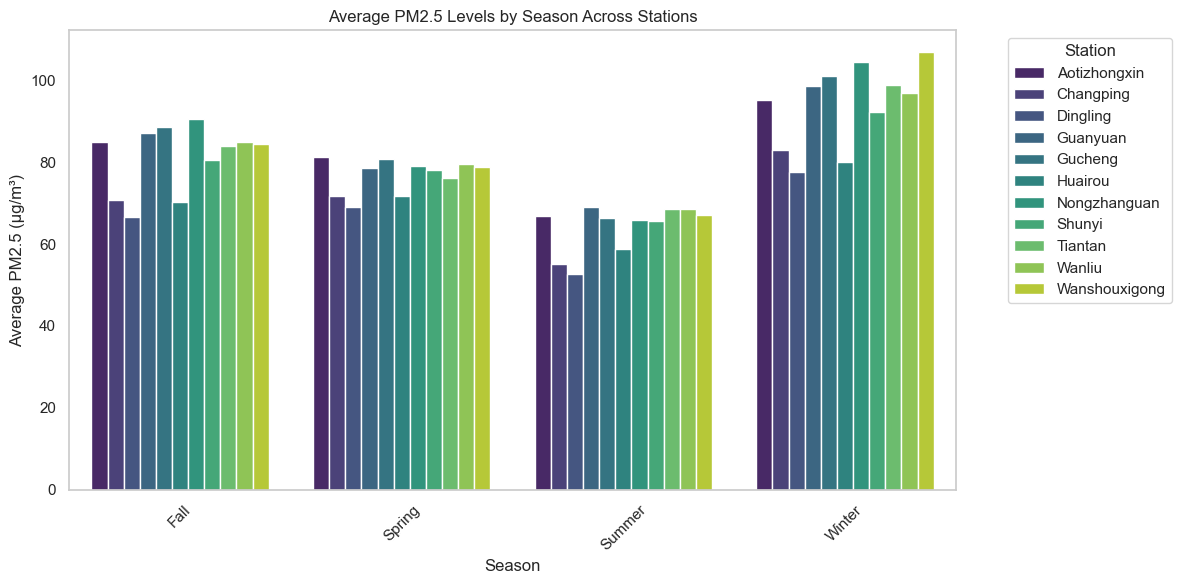

In [128]:
cleaned_df_copy = cleaned_df.copy()

cleaned_df_copy['datetime'] = pd.to_datetime(cleaned_df_copy[['year', 'month', 'day', 'hour']])
cleaned_df_copy['month'] = cleaned_df_copy['datetime'].dt.month

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

cleaned_df_copy['season'] = cleaned_df_copy['month'].apply(get_season)
seasonal_pm25 = cleaned_df_copy.groupby(['station', 'season'])['PM2.5'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=seasonal_pm25, x='season', y='PM2.5', hue='station', palette='viridis')
plt.title('Average PM2.5 Levels by Season Across Stations')
plt.xlabel('Season')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.xticks(rotation=45)
plt.legend(title='Station', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Insight:**
- Creating cleaned_df_copy again so it wont distrupt the main cleaned_df data.
- Extract month value from datetime and create season column in get_season() using basic if-elif-else.
- Create and apply the new season column to the data with apply().
- Calculate average PM2.5 levels across every station by season.

**Answer**
- Based from the result, it appears that winter has the worst air quality, with the highest PM2.5 levels among all seasons. Despite being so close in time, summer has the best air quality among all seasons.

## Analisis Lanjutan (Opsional)

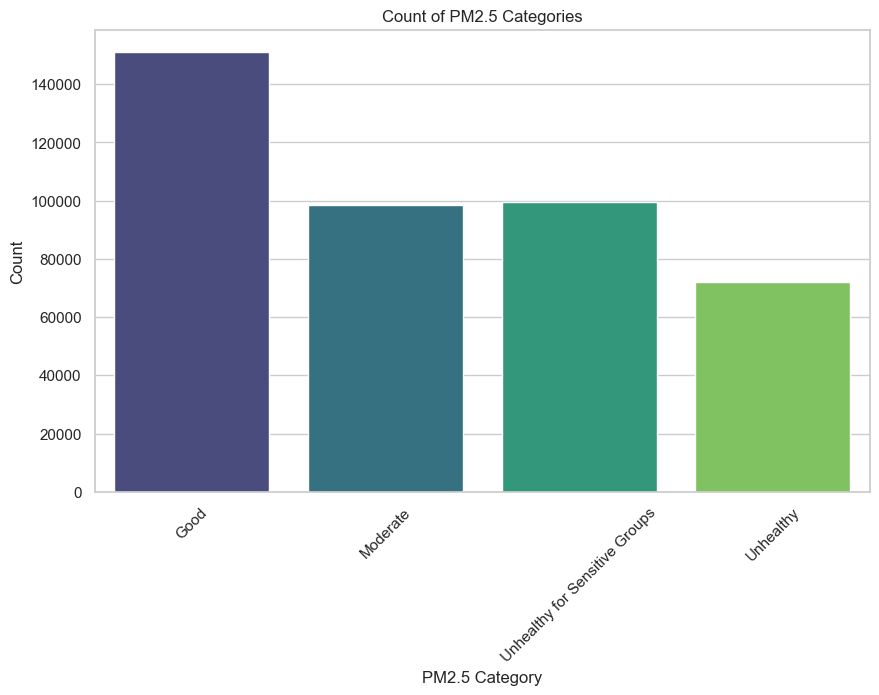

In [129]:
def categorize_pm25(value):
    if value < 35:
        return 'Good'
    elif value < 75:
        return 'Moderate'
    elif value < 150:
        return 'Unhealthy for Sensitive Groups'
    else:
        return 'Unhealthy'

combined_df['PM2.5 Category'] = combined_df['PM2.5'].apply(categorize_pm25)

plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='PM2.5 Category', hue='PM2.5 Category', palette='viridis', legend=False)
plt.title('Count of PM2.5 Categories')
plt.xlabel('PM2.5 Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Classify PM2.5 levels into four categories: Good, Moderate, Unhealthy for Sensitive Groups, and Unhealthy, using basic if-elif-else for better understanding air quality status.
- Data transformation for function categorization is applied to the PM2.5 data, creating a new column that simplifies analysis and interpretation.
- Seaborn's countplot is used to visualizes the distribution of PM2.5 categories, highlighting the prevalence of each category.
- This analysis informs stakeholders about air quality levels, supporting public health initiatives and policy decisions.
- Identifying pollution hotspots can guide interventions to improve air quality and protect community health.

## Conclusion

- Conclution pertanyaan 1: The analysis assessed the percentage of time PM2.5 levels at various stations exceeded the WHO’s PM2.5 4th interim target threshold of 25 µg/m³ on 24-hours term. Among the stations, Guncheng station had the highest percentage of time above the threshold, indicating the worst air quality. In contrast, Dingling station recorded the lowest percentage, signifying relatively better air quality compared to other stations.
- Conclution pertanyaan 2: When examining the data across different seasons, it was observed that winter had the highest PM2.5 levels, making it the season with the worst air quality. Summer, despite its proximity to winter, showed the best air quality with the lowest PM2.5 levels, reflecting a clear seasonal effect on pollution levels.

## Export Final Data

In [130]:
combined_df.drop_duplicates(inplace=True)

combined_df.to_csv('dashboard/main_data.csv', index=False)

print("Data has been combined and exported to main_data.csv")

Data has been combined and exported to main_data.csv


**Insight:**
- this section is used only to combine all the csv files that already being filtered before, then export it to the dashboard folder as main_data.csv for dashboard data source purposes.